# Merging
ahlive allows data to be combined into a single figure to let the animations run simultaneously.

### merging functions
ahlive has these functions for merging data:

ahlive method | operator | description
--- | --- | --- 
`ah.overlay` | `*` | stack plots over one another into a single subplot
`ah.cascade` | `-` |  like overlay, but animates the data serially, one after another
`ah.layout` | `+` `/` | arrange plots horizontally or vertically as multiple subplots
`ah.merge` |  | a generic method for all merges by specifying `join`

### overlay objects
To overlay, simply multiply the objects.

This results in an `ah.Data` object that contains multiple `item`s within the wrapped `xr.Dataset`.

<ahlive.Data>
Subplot:         (1, 1)
Dimensions:      (item: 2, state: 3)
Data variables:
    chart    (item) object 'line' 'line'
    label    (item) object 'Array One' 'Array Two'
    group    (item) object '' ''
    interp   (item) object 'cubic' 'cubic'
    ease     (item) object 'in_out' 'in_out'
    x        (item, state) float64 0.0 1.0 2.0 0.0 1.0 2.0
    y        (item, state) float64 4.0 5.0 4.0 3.0 5.0 6.0


[########################################] | 100% Completed |  4.2s



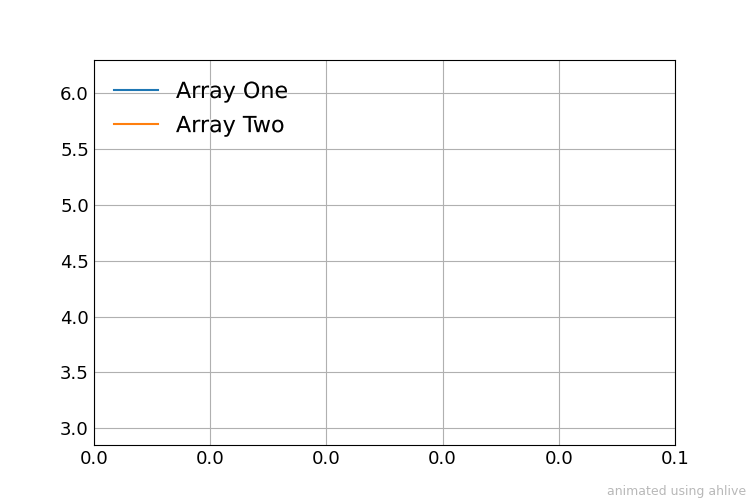

In [1]:
import ahlive as ah
arr1 = ah.Array([0, 1, 2], [4, 5, 4], label='Array One', chart='line')
arr2 = ah.Array([0, 1, 2], [3, 5, 6], label='Array Two', chart='line')
overlay = arr1 * arr2
print(overlay)
overlay.render()

### cascade objects
To cascade, simply subtract the objects.

This results in an `ah.Data` object that contains additional `item`s and `state`s within the wrapped `xr.Dataset`.

In [ ]:
import ahlive as ah
arr1 = ah.Array([0, 1, 2], [0, 5, 4], label='Array One', chart='line')
arr2 = ah.Array([0, 1, 2], [3, 5, 6], label='Array Two', chart='line')
cascade = arr1 - arr2
print(cascade)
cascade.render()

### layout objects
To layout, simply 
add the objects to lay them out horizontally or divide the objects to lay them out vertically.

This results in an `ah.Data` object that contains multiple `key`s within the wrapped `dict`.

In [ ]:
import ahlive as ah
arr1 = ah.Array([0, 1, 2], [4, 5, 4], title='Array One', chart='line')
arr2 = ah.Array([0, 1, 2], [3, 5, 6], title='Array Two', chart='line')
arr3 = ah.Array([0, 1, 2], [7, 8, 0], title='Array Three', chart='line')
layout = (arr1 + arr2) / arr3
print(layout)
layout.render()

Instead of manually using the divide operator to achieve a vertical layout, the max number of columns can be specified through `cols`.

Any subplot that exceeds the max number of `cols` is wrapped to the next row.

In [ ]:
import ahlive as ah
arr1 = ah.Array([0, 1, 2], [4, 5, 4], title='Array One', chart='line')
arr2 = ah.Array([0, 1, 2], [3, 5, 6], title='Array Two', chart='line')
arr3 = ah.Array([0, 1, 2], [7, 8, 0], title='Array Three', chart='line')
layout = (arr1 + arr2 + arr3).cols(2)
layout.render()

### merge list

To merge a list of objects, use the built-in method, `merge` specifying the `join` method.

This is useful for dynamically created objects, such as through list comprehensions.

In [ ]:
import ahlive as ah
for join in ['overlay', 'layout', 'cascade']:
    merged = ah.merge([
        ah.Array(
            [0, 1, 2], [i, i + 1, i + 2], title=join
        ) for i in range(0, 3)
    ], join=join)
    merged.render()

<div class="alert alert-warning">

If all the objects are identically formatted, specifying `quick=True` in `ah.merge` can speed up the merges. 
`ah.DataFrame` and `ah.Dataset` have a built-in `join` keyword argument that does this internally.

</div>